# Precision recall analysis

Use cytominer_eval to calculate average precision @k

In [1]:
import pandas as pd
import numpy as np
from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds

In [2]:
data_dir = '../01_data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz'
df = pd.read_csv(data_dir)

In [3]:
df = ds.clean_moas(df)
df = ds.drop_feats(df, 50)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
df.head()

dropped 59 features


,Metadata_Plate_Map_Name,Metadata_cell_id,Metadata_broad_sample,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target,Cells_AreaShape_Compactness,...,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_InverseDifferenceMoment_RNA_10_0,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_Variance_RNA_10_0
1,C-7161-01-LM6-001,A549,BRD-A26032986-050-02-1,C13,10.0,6,48H,calmodulin antagonist,CALM1,0.052299,...,-0.641374,1.514300,-0.361908,-1.321410,-0.160391,-0.928242,-0.681633,-1.068360,-0.446784,-0.177102
2,C-7161-01-LM6-001,A549,BRD-A26095496-001-04-0,D13,10.0,6,48H,glucocorticoid receptor agonist,NR3C1|PLA2G1B,0.485075,...,-5.430540,-5.802180,0.029379,0.794536,-1.601920,-1.625970,-1.032820,-1.801660,-1.139450,2.523760
4,C-7161-01-LM6-001,A549,BRD-A26690767-066-01-9,E13,10.0,6,48H,HIV protease inhibitor,CYP3A4,-0.598178,...,-2.995770,-0.943642,-0.593867,-0.366031,-0.145932,-1.248330,-0.634703,-1.315860,-0.843238,0.286981
5,C-7161-01-LM6-001,A549,BRD-A26711594-003-10-6,E19,10.0,6,48H,calcium channel blocker,ADORA3,0.354016,...,-0.806278,1.045140,-0.333954,-1.323030,0.674326,-0.819150,-0.449688,-0.859692,-0.406020,-0.780604
7,C-7161-01-LM6-001,A549,BRD-A27732521-003-08-3,H01,10.0,6,48H,voltage-gated sodium channel blocker,CYP2C19|CYP2D6,0.603841,...,-0.212402,0.350726,1.554940,-0.526875,-0.151872,0.529546,0.594847,0.548497,-1.032410,-0.375086


In [4]:
replicate_group=["Metadata_moa"]
k_range = [2, 5, 10, 15, 20]

precision_recall_results = evaluate(
    profiles=df,
    features=features,
    meta_features=meta_features,
    replicate_groups=replicate_group,
    operation="precision_recall",
    similarity_metric="pearson",
    precision_recall_k=k_range
)

In [5]:
# calculate the average
pr_av = []
for k in precision_recall_results.k.unique():
    pr_av.append(precision_recall_results.query("k==@k").mean().tolist())
result = pd.DataFrame(pr_av, columns=["k","precision","recall"])

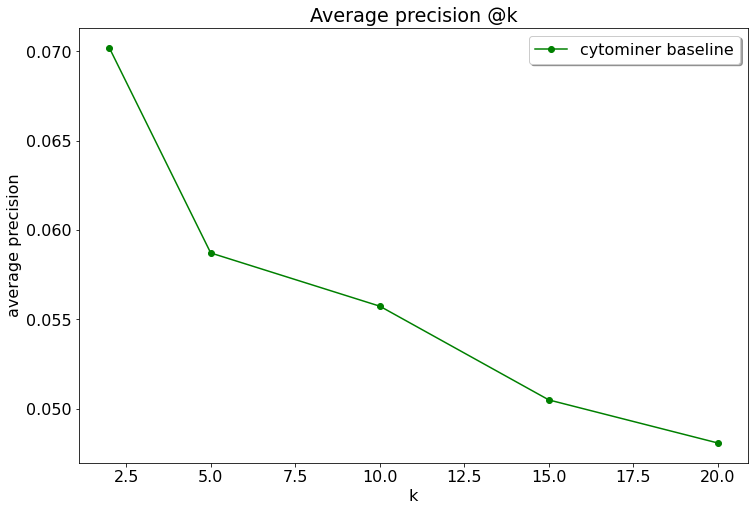

In [6]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(result["k"], result["precision"], marker="o", color="green", label = 'cytominer baseline')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()